In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penugasan-oprec-dsai-2024/sample_submission.csv
/kaggle/input/penugasan-oprec-dsai-2024/Train.csv
/kaggle/input/penugasan-oprec-dsai-2024/Test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('/kaggle/input/penugasan-oprec-dsai-2024/Train.csv')
df_test = pd.read_csv('/kaggle/input/penugasan-oprec-dsai-2024/Test.csv')

EDA

In [4]:
df_train

,id,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary
0,0,2024.0,NaN,FT,Data Engineer,USD,US,0.0,US,M,138000
1,1,2024.0,SE,FT,Software Engineer,USD,US,2.0,NaN,M,180000
2,2,2024.0,NaN,FT,Machine Learning Engineer,USD,US,0.0,US,M,118500
3,3,2024.0,NaN,NaN,Data Engineer,USD,US,0.0,US,M,180000
4,4,2024.0,SE,FT,Product Manager,USD,US,0.0,US,NaN,204000
...,...,...,...,...,...,...,...,...,...,...,...
35073,49995,2024.0,SE,NaN,Data Analyst,USD,AU,NaN,NaN,M,88333
35074,49996,NaN,MI,NaN,Business Intelligence,USD,US,NaN,US,M,252291
35075,49997,2024.0,NaN,FT,Product Manager,USD,US,0.0,US,NaN,196010
35076,49998,NaN,MI,FT,Data Architect,USD,PT,0.0,PT,M,50316


In [5]:
df_train.nunique()

id                    35078
work_year                 5
experience_level          4
employment_type           4
job_title               209
salary_currency          10
employee_residence       59
remote_ratio              3
company_location         61
company_size              3
salary                14960
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35078 entries, 0 to 35077
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  35078 non-null  int64  
 1   work_year           28062 non-null  float64
 2   experience_level    28062 non-null  object 
 3   employment_type     28062 non-null  object 
 4   job_title           35078 non-null  object 
 5   salary_currency     35078 non-null  object 
 6   employee_residence  28062 non-null  object 
 7   remote_ratio        28062 non-null  float64
 8   company_location    28062 non-null  object 
 9   company_size        28062 non-null  object 
 10  salary              35078 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 2.9+ MB


In [7]:
df_train.describe()

,id,work_year,remote_ratio,salary
count,35078.000000,28062.000000,28062.000000,35078.000000
mean,23213.081476,2023.686373,0.482646,150517.661811
std,14114.394161,0.698085,0.855120,72965.037566
min,0.000000,2020.000000,0.000000,15000.000000
25%,11158.750000,2024.000000,0.000000,99070.750000
50%,22410.500000,2024.000000,0.000000,140000.000000
75%,34760.750000,2024.000000,0.000000,191920.500000
max,49999.000000,2024.000000,2.000000,800000.000000


In [8]:
df_train.duplicated().sum()

0

In [9]:
df_train.isnull().sum() / len(df_train) * 100

id                     0.00000
work_year             20.00114
experience_level      20.00114
employment_type       20.00114
job_title              0.00000
salary_currency        0.00000
employee_residence    20.00114
remote_ratio          20.00114
company_location      20.00114
company_size          20.00114
salary                 0.00000
dtype: float64

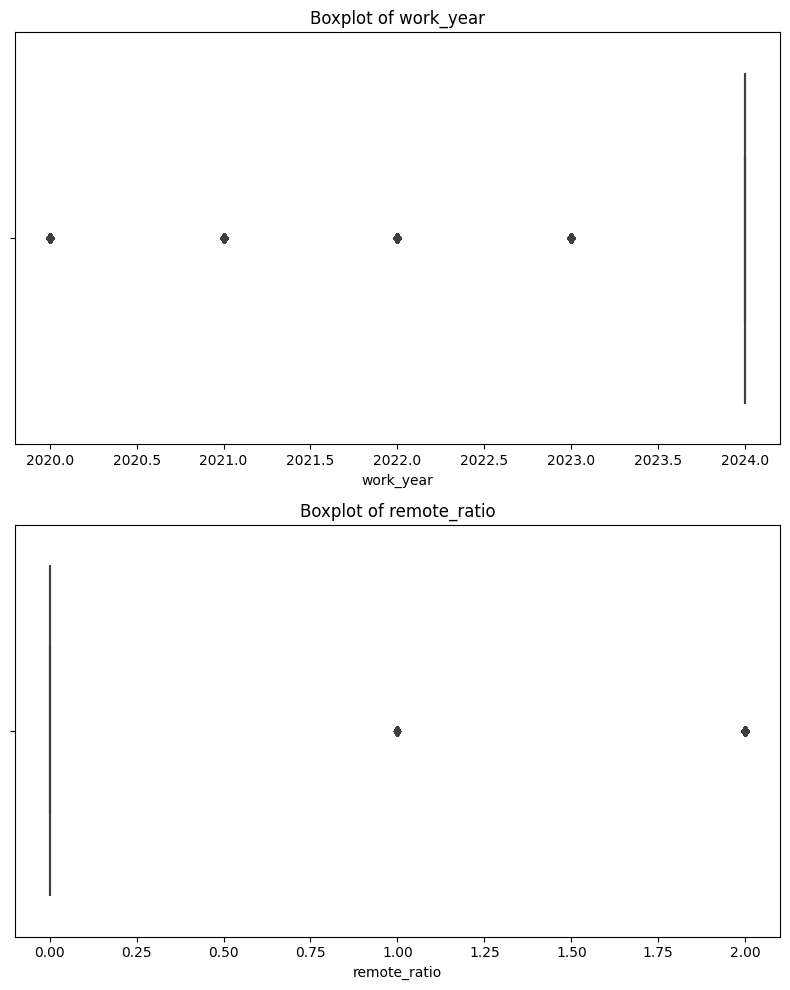

In [10]:
# Specify the numerical columns (adjust as per your data)
numerical_columns = ['work_year', 'remote_ratio']  # example columns

# Set up the plot (one plot per column, vertically)
plt.figure(figsize=(8, len(numerical_columns) * 5))  # Adjust figure size for vertical arrangement

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)  # Arrange vertically (n rows, 1 column)
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

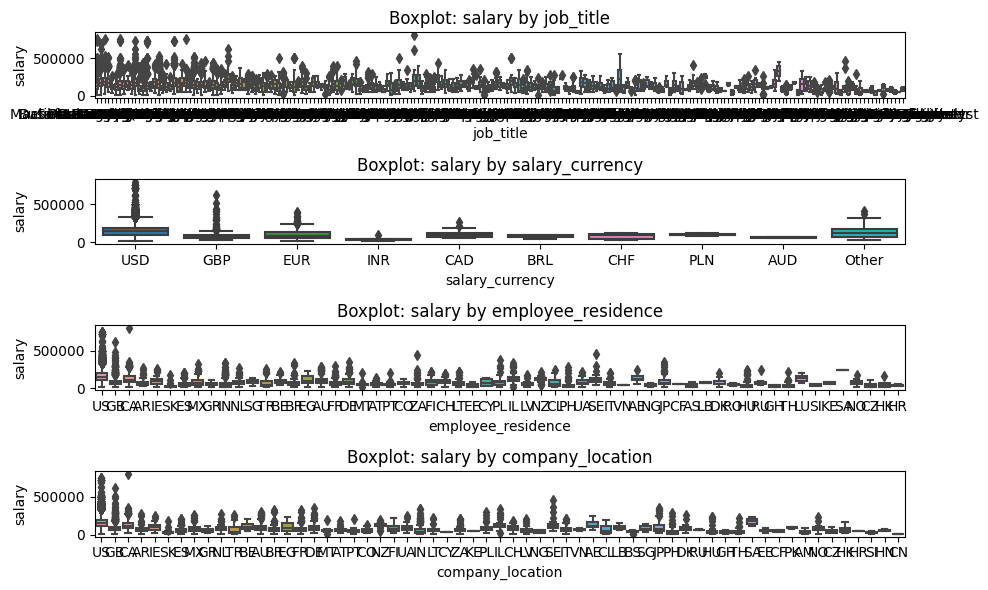

In [11]:
categorical_columns = ['job_title', 'salary_currency', 'employee_residence', 'company_location']
numerical_column = 'salary'

# Set up a figure with subplots (one plot per categorical column)
plt.figure(figsize=(10, 6))

# Loop through each categorical column and plot a boxplot below the previous one
for i, cat_col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)  # Create subplots in a single column (below each other)
    sns.boxplot(x=cat_col, y=numerical_column, data=df_train)
    plt.title(f'Boxplot: {numerical_column} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(numerical_column)

# Adjust the layout so plots don't overlap
plt.tight_layout()
plt.show()

Data Preprocessing

In [12]:
df_train = df_train.apply(lambda col: col.fillna(col.mode()[0]) if col.isnull().any() else col)
df_test = df_test.apply(lambda col: col.fillna(col.mode()[0]) if col.isnull().any() else col)

In [13]:
df_train['experience_level'] = df_train['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})
df_test['experience_level'] = df_test['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})

In [14]:
df_train = pd.get_dummies(df_train, columns=['experience_level', 'employment_type', 'company_size'])
df_test = pd.get_dummies(df_test, columns=['experience_level', 'employment_type', 'company_size'])

In [15]:
# List of categorical columns to apply frequency encoding
categorical_columns = ['job_title', 'salary_currency', 'employee_residence', 'company_location']

# Apply frequency encoding to each categorical column for training data
for col in categorical_columns:
    frequency_encoding = df_train[col].value_counts()
    df_train[f'{col}_encoded'] = df_train[col].map(frequency_encoding)

# Apply frequency encoding to each categorical column for test data
for col in categorical_columns:
    frequency_encoding = df_train[col].value_counts()  # Use the training data's encoding
    df_test[f'{col}_encoded'] = df_test[col].map(frequency_encoding)

# Drop original columns from both training and test data
df_train.drop(columns=categorical_columns, inplace=True)
df_test.drop(columns=categorical_columns, inplace=True)

In [16]:
df_train

,id,work_year,remote_ratio,salary,experience_level_0,experience_level_1,experience_level_2,experience_level_3,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,company_size_L,company_size_M,company_size_S,job_title_encoded,salary_currency_encoded,employee_residence_encoded,company_location_encoded
0,0,2024.0,0.0,138000,False,False,True,False,False,False,True,False,False,True,False,5050,33830,30679,30740
1,1,2024.0,2.0,180000,False,False,True,False,False,False,True,False,False,True,False,3337,33830,30679,30740
2,2,2024.0,0.0,118500,False,False,True,False,False,False,True,False,False,True,False,2377,33830,30679,30740
3,3,2024.0,0.0,180000,False,False,True,False,False,False,True,False,False,True,False,5050,33830,30679,30740
4,4,2024.0,0.0,204000,False,False,True,False,False,False,True,False,False,True,False,404,33830,30679,30740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35073,49995,2024.0,0.0,88333,False,False,True,False,False,False,True,False,False,True,False,4126,33830,163,30740
35074,49996,2024.0,0.0,252291,False,True,False,False,False,False,True,False,False,True,False,140,33830,30679,30740
35075,49997,2024.0,0.0,196010,False,False,True,False,False,False,True,False,False,True,False,404,33830,30679,30740
35076,49998,2024.0,0.0,50316,False,True,False,False,False,False,True,False,False,True,False,744,33830,51,41


In [17]:
df_test

,id,work_year,remote_ratio,experience_level_0,experience_level_1,experience_level_2,experience_level_3,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,company_size_L,company_size_M,company_size_S,job_title_encoded,salary_currency_encoded,employee_residence_encoded,company_location_encoded
0,0,2024,0,False,False,True,False,True,False,False,False,False,True,False,1938,33830,30679,30740
1,1,2023,0,False,True,False,False,False,False,True,False,False,True,False,5050,33830,30679,30740
2,2,2024,0,False,False,True,False,False,False,True,False,False,True,False,1938,33830,30679,30740
3,3,2024,0,False,False,True,False,False,False,True,False,False,True,False,3337,33830,30679,30740
4,4,2024,0,False,True,False,False,False,False,True,False,False,True,False,3337,33830,30679,30740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765,8765,2024,0,False,True,False,False,False,False,True,False,False,True,False,2377,33830,30679,30740
8766,8766,2024,0,True,False,False,False,False,False,True,False,False,True,False,1230,33830,30679,30740
8767,8767,2023,0,False,False,True,False,False,False,True,False,False,True,False,2377,33830,30679,30740
8768,8768,2024,0,False,True,False,False,False,False,True,False,False,True,False,3337,33830,30679,30740


In [18]:
from sklearn.preprocessing import StandardScaler

# For all numerical features except 'salary'
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

## Exclude 'salary' and 'id' from the numerical columns for scaling in df_train and df_test
numerical_columns_to_scale = numerical_columns[numerical_columns != 'salary']
numerical_columns_to_scale = numerical_columns_to_scale[numerical_columns_to_scale != 'id']

# Apply scaling (e.g., StandardScaler) to all numerical features in df_train
scaler = StandardScaler()
df_train[numerical_columns_to_scale] = scaler.fit_transform(df_train[numerical_columns_to_scale])

# Apply scaling to df_test, but exclude 'salary' column from scaling
df_test[numerical_columns_to_scale] = scaler.transform(df_test[numerical_columns_to_scale])

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Assuming 'salary' is the target and 'id' is an identifier (not used in training)
y_train = df_train['salary'].values
X_train = df_train.drop(['salary', 'id'], axis=1).values
X_test = df_test.drop(['id'], axis=1).values  # Ensure X_test is the feature set

# List of models to test
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Neighbors Regressor': KNeighborsRegressor()
}

# Variables to track the best model
best_rmse = float('inf')  # Start with a very large number
best_model_name = None
best_model = None
best_predictions = None

# Test each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Make predictions on X_test

    # Assuming no 'y_test' is available since df_test doesn't contain the target (salary)
    mse = mean_squared_error(y_train, model.predict(X_train))  # Evaluate on training data or any validation set if available
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, model.predict(X_train))

    # Save the model's performance
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2,
        'Test Predictions': y_pred  # Use y_pred as predictions on X_test
    })
    
    # Check if this model has the best RMSE
    if rmse < best_rmse:
        best_rmse = rmse
        best_model_name = name
        best_model = model
        best_predictions = y_pred

# Print the results for all models
for result in results:
    print(f"Model: {result['Model']}")
    print(f"MSE: {result['MSE']:.4f}")
    print(f"RMSE: {result['RMSE']:.4f}")
    print(f"R-squared: {result['R-squared']:.4f}")
    print(f"Test Predictions (first 5): {result['Test Predictions'][:5]}")
    print()

# Print the best model's performance and predictions
print(f"Best Model: {best_model_name}")
print(f"Best RMSE: {best_rmse:.4f}")
print(f"Best Model's Test Predictions (first 5): {best_predictions[:5]}")


Model: Linear Regression
MSE: 4510727023.4417
RMSE: 67161.9462
R-squared: 0.1527
Test Predictions (first 5): [138048. 144200. 173400. 170632. 153328.]

Model: Ridge Regression
MSE: 4510721586.1186
RMSE: 67161.9058
R-squared: 0.1527
Test Predictions (first 5): [137996.92966984 144278.83609758 173375.98464571 170610.24150886
 153397.9402027 ]

Model: Lasso Regression
MSE: 4510722285.1545
RMSE: 67161.9110
R-squared: 0.1527
Test Predictions (first 5): [137865.7544931  144282.3004853  173373.2997395  170608.49935513
 153401.27242635]

Model: Decision Tree
MSE: 3302234264.4339
RMSE: 57465.0700
R-squared: 0.3797
Test Predictions (first 5): [135812.62962963 137214.15555556 179690.55280172 198415.30574324
 177362.12690355]

Model: Random Forest
MSE: 3347462025.7964
RMSE: 57857.2556
R-squared: 0.3712
Test Predictions (first 5): [137395.79182674 136789.67791463 179733.81276656 198311.10695035
 177206.73677161]

Model: Gradient Boosting
MSE: 3849672908.7561
RMSE: 62045.7324
R-squared: 0.2769
Test 

Modelling

In [20]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'id': df_test['id'],  # Assuming 'id' is present in df_test for identification
    'salary': best_predictions
})

# Save to CSV
predictions_df.to_csv('predictions.csv', index=False)
print("Predictions have been saved to 'predictions.csv'.")

Predictions have been saved to 'predictions.csv'.
